# Точечные операции, градационные преобразования, гистограммы.

### Обязательные библиотеки

In [1]:
import math
from collections import Counter
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from skimage import io, color, exposure, data, img_as_float

### Общий код

### Задание №1

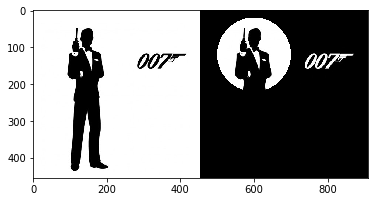

In [2]:
img = color.rgb2gray(io.imread('pictures/2bond.jpg'))
center = (145, 120)
radius = 100
matrix1, matrix2 = np.meshgrid(np.arange(0, img.shape[0]), np.arange(0, img.shape[1]))
mask = np.vectorize(lambda x, y: 1 if np.sqrt((x - center[0]) ** 2 + (y - center[1]) ** 2) < radius else 0)(matrix1, matrix2)
tmp = abs(1 - img[100:200, 270:420])
with_mask = mask * img
with_mask[100:200, 270:420] = tmp
plt.imshow(np.concatenate((img, with_mask), axis=1), cmap='gray', vmin=0, vmax=1)

### Задание №2

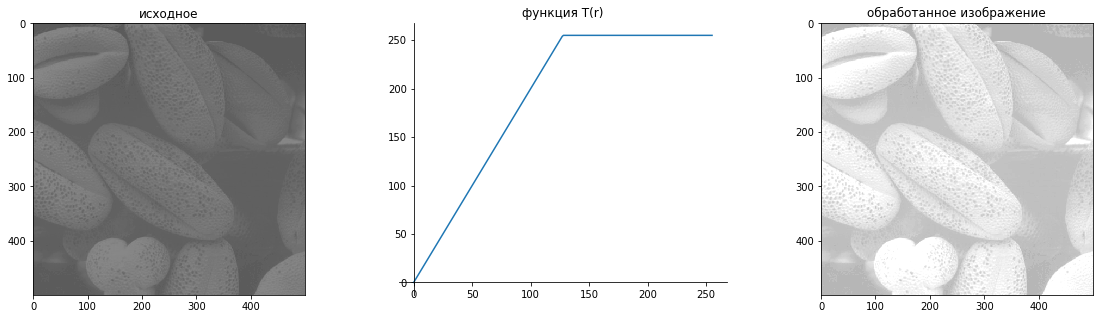

In [3]:
def draw(img, img2, Tr, r):
    plt.figure(figsize=(20,5))
    # первая картинка
    plt.subplot(1,3,1)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.title('исходное')

    # вторая картинка
    ax = plt.subplot(1,3,2)
    # меняем расположение левой оси (координата 0)
    ax.spines['left'].set_position(('data',0))
    # меняем расположение нижней оси (координата 0)
    ax.spines['bottom'].set_position(('data',0))
    # убираем правую ось
    ax.spines['right'].set_color('none')
    # убираем левую ось
    ax.spines['top'].set_color('none')
    # рисуем график функции
    plt.plot(r,Tr)
    plt.title('функция T(r)')

    # третья картинка
    plt.subplot(1,3,3)
    plt.imshow(img2, cmap='gray', vmin=0, vmax=255)
    plt.title('обработанное изображение');

    
# функция градационного преобразования
def T(r):
    if r < 128:
        return 2*r
    else:
        return 255

# конвертация функции T в векторизированную
Tf = np.vectorize(T)

# исходное изображение
img = io.imread('pictures/2pic2.tif')
# ображение, обработанное функцией T(r)
img2 = Tf(img)


# значения r для построения графика функции T(r)
r=np.arange(0,256)
# значения функции T(r)
Tr=Tf(r)

# выводит на экран изображения и график
draw(img, img2, Tr, r)

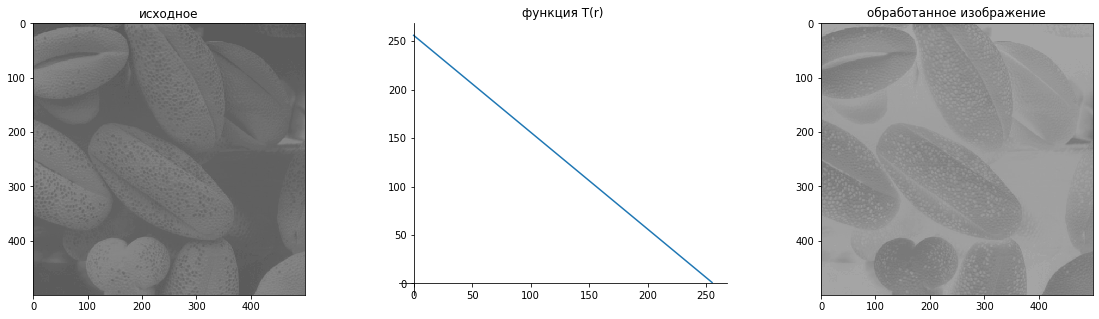

In [4]:
def T(r):
    return 256 - r
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r)

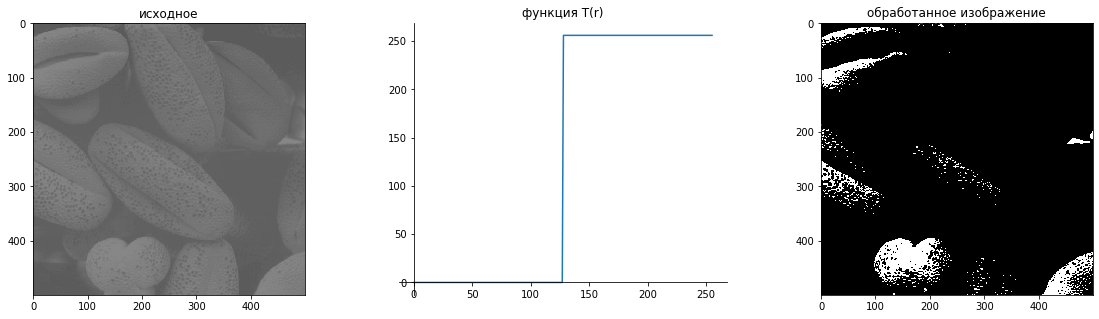

In [5]:
def T(r):
    if r > 127:
        return 256
    else:
        return 0
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r)

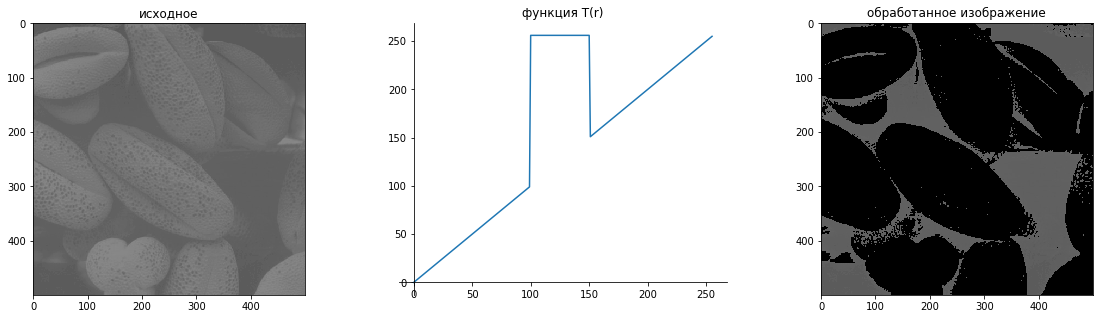

In [6]:
def T(r):
    if r >= 100 and r <= 150:
        return 256
    else:
        return r
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r)

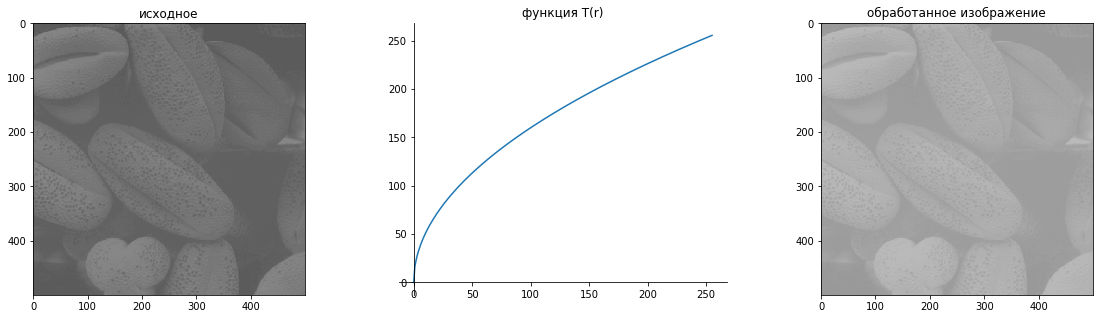

In [7]:
def T(r):
    return math.sqrt(r) * 256 / math.sqrt(256)
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r)

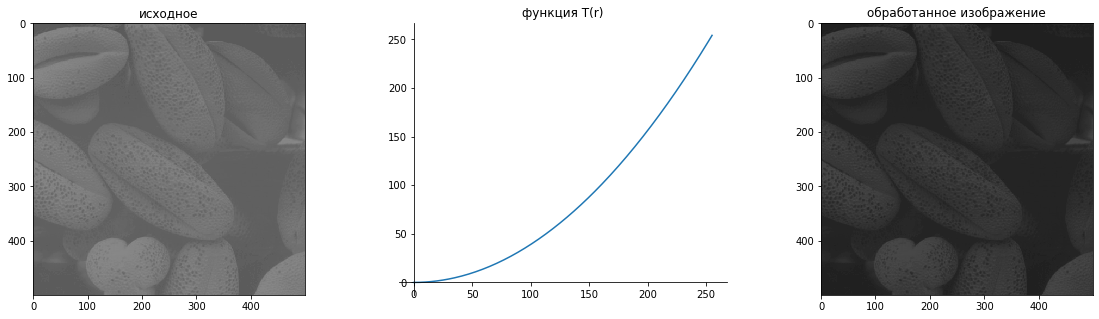

In [8]:
def T(r):
    return r ** 2 * 256 / 256**2 
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r)

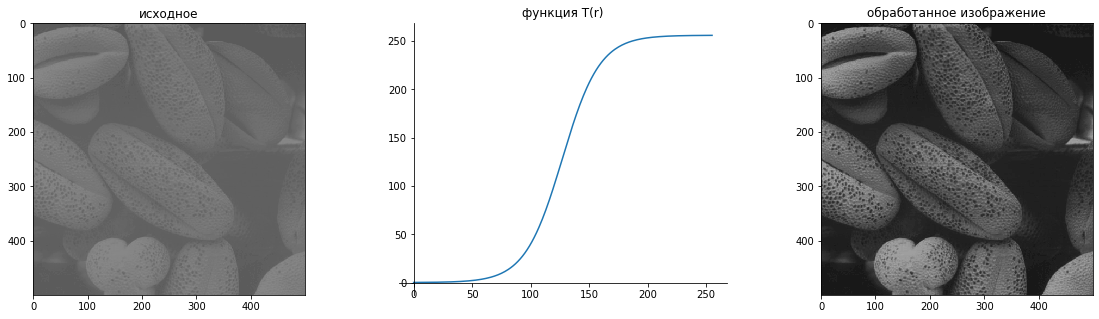

In [9]:
def T(r):
    return 256 / (1 + math.exp((-r + 127)/16))
    
Tf = np.vectorize(T)
img2 = Tf(img)
Tr=Tf(r)

draw(img, img2, Tr, r);

### Задание №3

In [10]:
def processing(x, i):
    b = list(format(int(x), '#010b')[2:])
    b[7 - i] = '0'
    return int(''.join(b), 2)

def get_img(link, i):
    img = color.rgb2gray(io.imread('pictures/2pic_planes.png'))
    img = np.floor(img * 256)
    proc_img = np.vectorize(lambda x: processing(x, i))(img)
    plt.imshow(proc_img, cmap='gray', vmin=0, vmax=255)

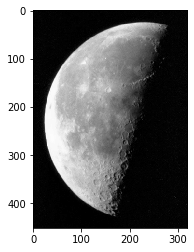

In [11]:
get_img('pictures/2pic_planes.png', 0)

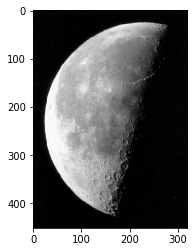

In [12]:
get_img('pictures/2pic_planes.png', 1)

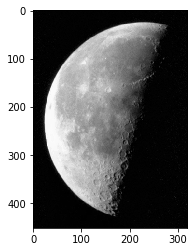

In [13]:
get_img('pictures/2pic_planes.png', 2)

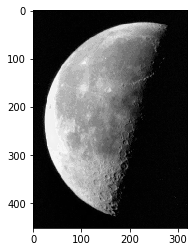

In [14]:
get_img('pictures/2pic_planes.png', 3)

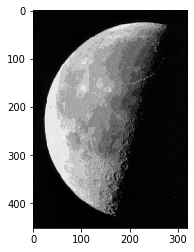

In [15]:
get_img('pictures/2pic_planes.png', 4)

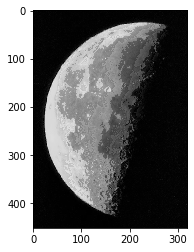

In [16]:
get_img('pictures/2pic_planes.png', 5)

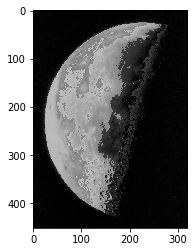

In [17]:
get_img('pictures/2pic_planes.png', 6)

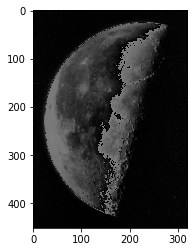

In [18]:
get_img('pictures/2pic_planes.png', 7)

### Задание №4

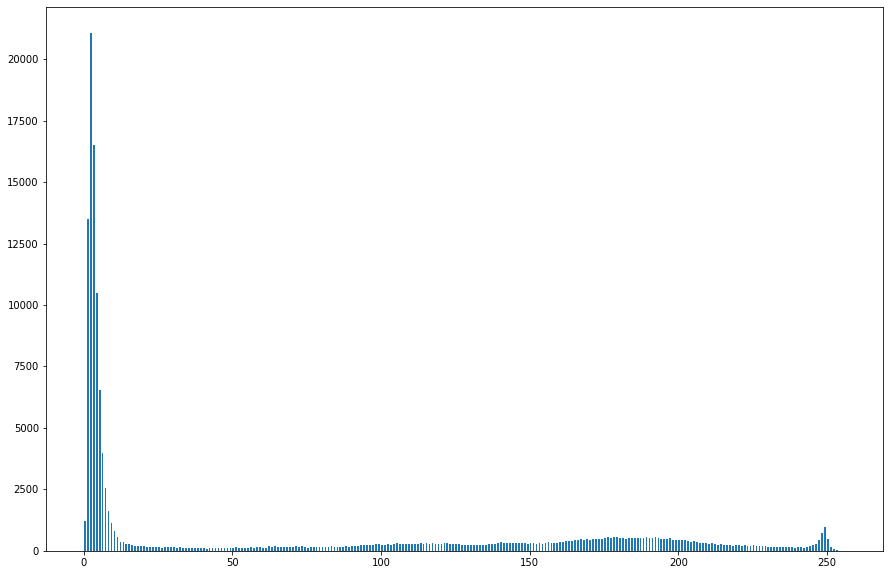

In [19]:
def histcount(img):
    img = np.floor(img * 256).astype(int)
    plt.figure(figsize=(15,10))
    plt.hist(img.ravel(), bins=range(257), width = 0.6)
    
img = color.rgb2gray(io.imread('pictures/2pic_planes.png'))
histcount(img)

### Задание №5

In [20]:
def hc(ax, index, img):
    img = np.floor(img).astype(int)
    ax[index].hist(img.ravel(), bins=range(257), width = 0.6)

    
def prepare(link):
    img = color.rgb2gray(io.imread(link))
    img_eq = exposure.equalize_hist(img)
    
    methods = [
        (lambda ax, index, img: ax[index].imshow(img, cmap='gray', vmin=0, vmax=255), img), 
        (lambda ax, index, img: hc(ax, index, img), img),
        (lambda ax, index, img: hc(ax, index, img), img_eq * 255),
        (lambda ax, index, img: ax[index].imshow(img, cmap='gray', vmin=0, vmax=1), img_eq)
    ]
    _, ax = plt.subplots(ncols=1, nrows=4, figsize=(10, 40))
    for index, callback in enumerate(methods):
        callback[0](ax, index, callback[1])

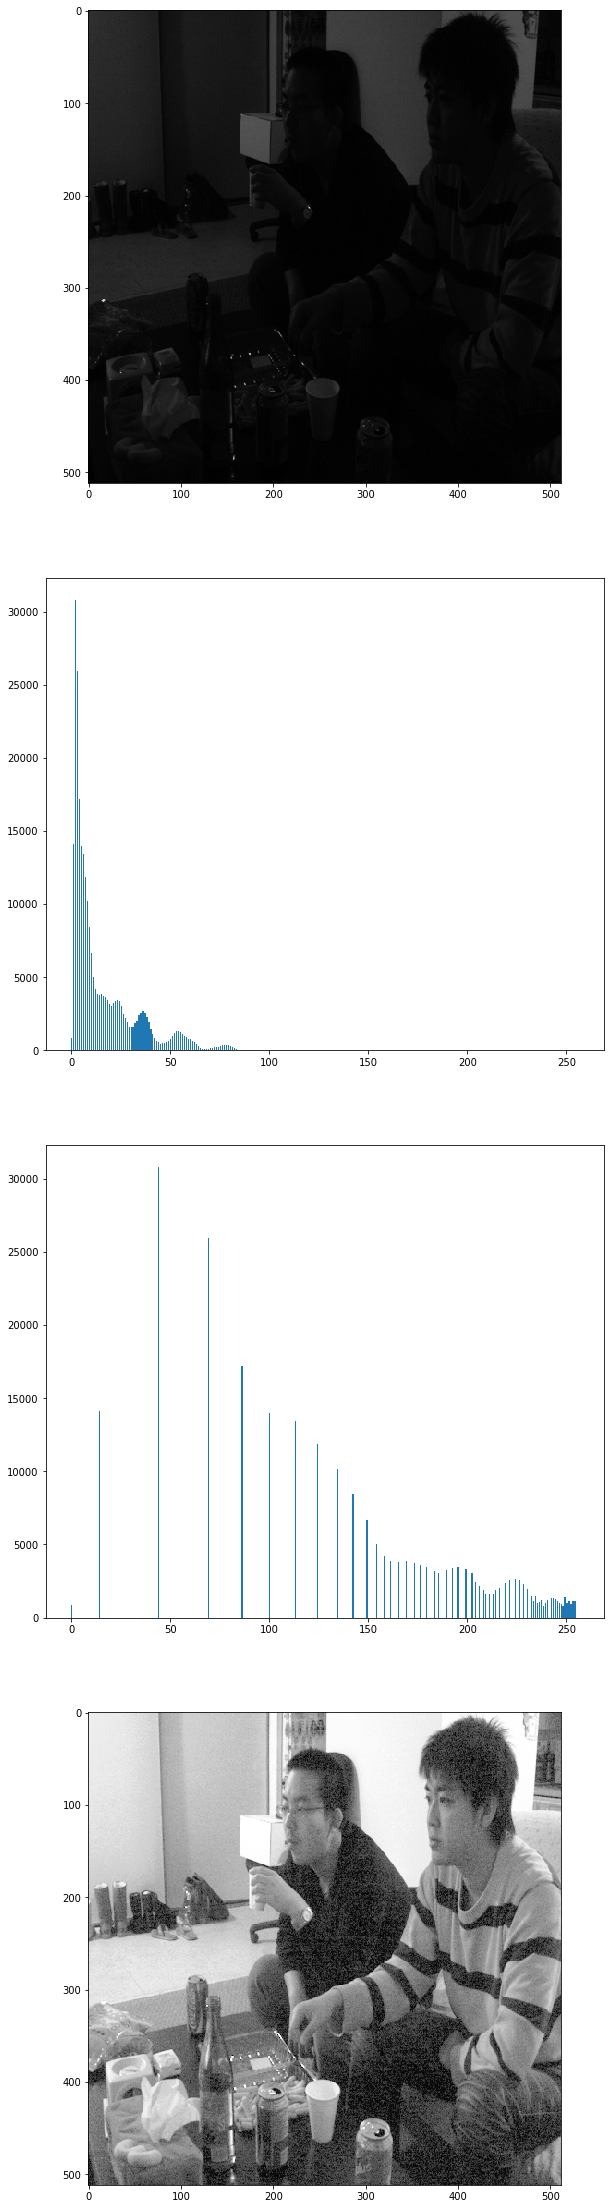

In [21]:
prepare('pictures/2pic_chang.tif')

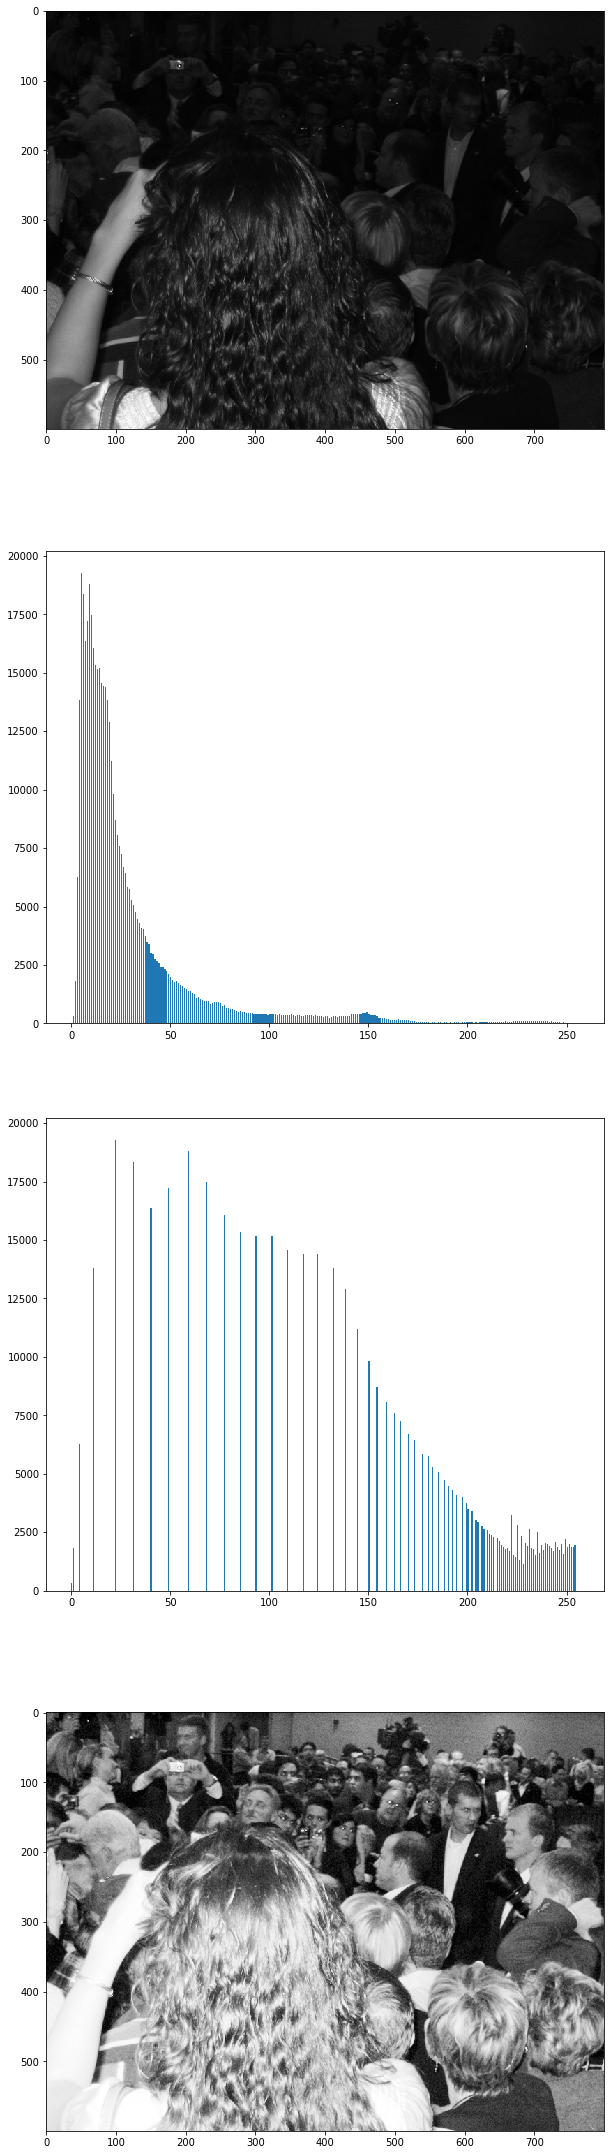

In [22]:
prepare('pictures/2pic_crowd.tif')

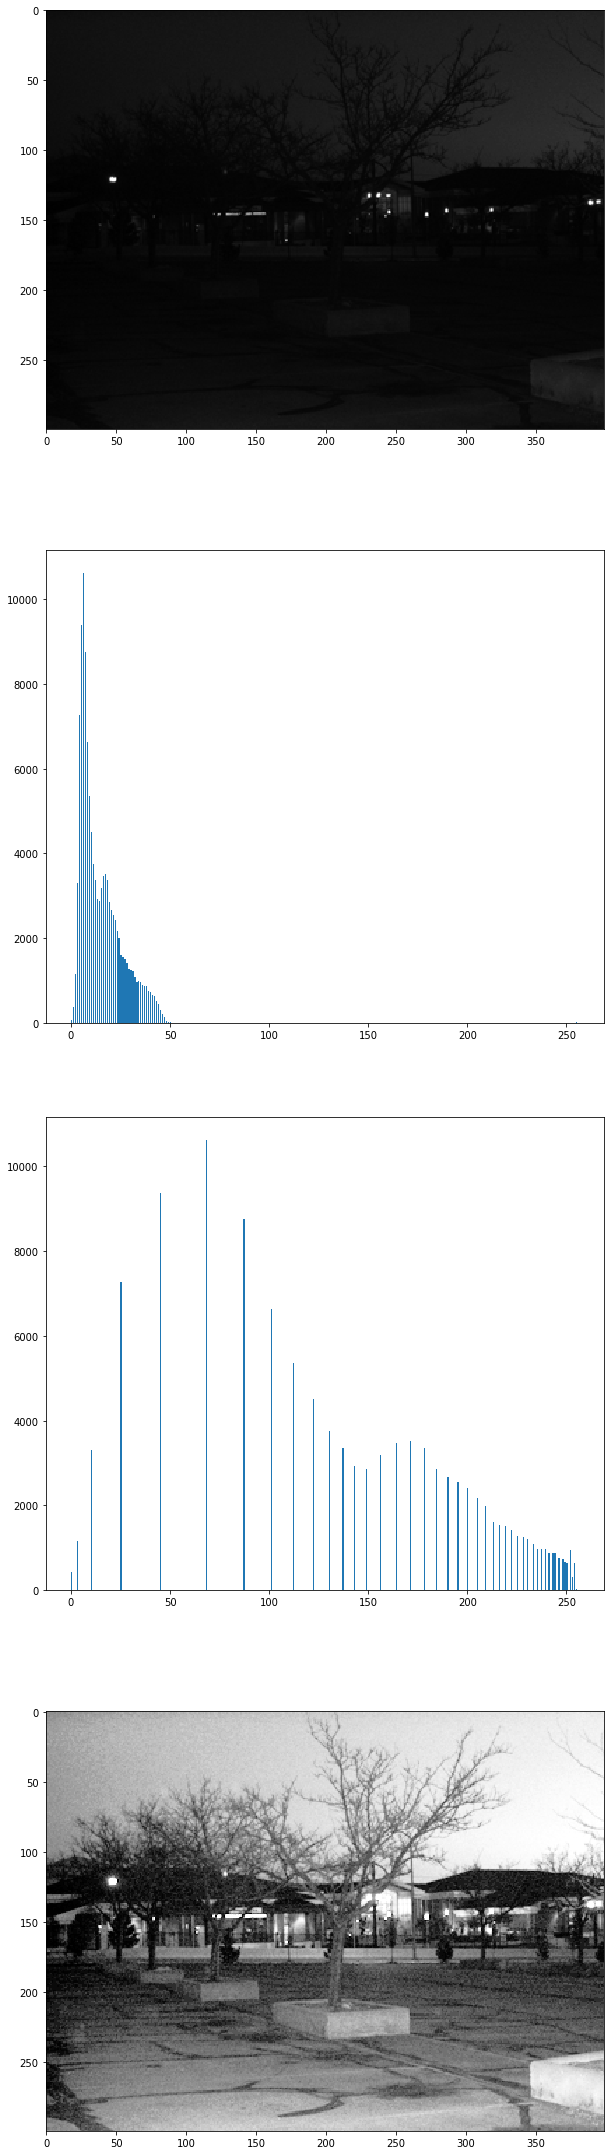

In [23]:
prepare('pictures/2pic_university.tif')

### Задание №6

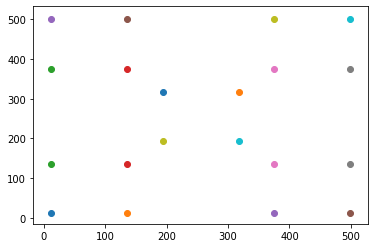

In [24]:
def histcount(img):
    img = np.floor(img * 256).astype(int)
    plt.figure(figsize=(15,10))
    plt.hist(img.ravel(), bins=range(257), width = 0.6)
    
# знатный усталый говнокод, который ищет углы квадрата
def find_squares(img):
    squares = []
    for i, row in enumerate(img):
        line = []
        flag = False
        for j, value in enumerate(row):
            if value < 150 and not flag:
                flag = True
                line.append((i, j))
            if value > 151 and flag:
                flag = False
                line.append((i, j))
        if len(line) != 0:
            squares.append(line)
    tmp = 0
    ystal = []
    for line in squares:
        if (line[0][0] - tmp) > 1:
            tmp = line[0][0]
            ystal.append(line)
        tmp += 1
    vse_radi_chego = []
    for line in ystal:
        for square in list(zip(*[iter(line)] * 2)):
            s = []
            s.append(square[0])
            s.append(square[1])
            delta = square[1][1] - square[0][1]
            s.append((delta + square[1][0], square[0][1]))
            s.append((delta + square[0][0], delta + square[0][1]))
            vse_radi_chego.append(s)
    return vse_radi_chego
                
img = color.rgb2gray(io.imread('pictures/2pic_fragments.png'))
squares = find_squares(img)
for s in squares:
    for i in s:
        plt.scatter(i[1], i[0])

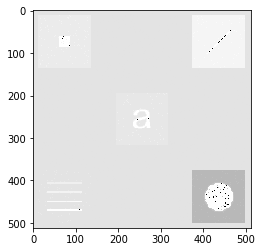

In [25]:
img = color.rgb2gray(io.imread('pictures/2pic_fragments.png'))

for s in squares:
    tmp = img[s[0][0]:s[2][0], s[0][1]:s[3][1]] 
    img[s[0][0]:s[2][0], s[0][1]:s[3][1]] = np.floor(exposure.equalize_hist(tmp) * 256).astype(int)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)